In [1]:
import deeptime
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
from sklearn.decomposition import PCA
from Tica import TICA
sys.path.append(os.getcwd())

In [2]:
def plot_dominant_component(ax, dxy, transformed, title):
    #from deeptime
    x, y = np.meshgrid(
         np.linspace(np.min(feature_trajectory[:, 0]), np.max(feature_trajectory[:, 0]), 4),
         np.linspace(np.min(feature_trajectory[:, 1]), np.max(feature_trajectory[:, 1]), 4)
    )
    ax.scatter(*feature_trajectory.T, marker='.', c=transformed)
    ax.quiver(x, y, dxy[0], dxy[1])
    ax.set_title(title)
    ax.set_aspect('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

In [3]:
#Data generation
from deeptime.data import ellipsoids
from deeptime.decomposition import VAMP
data = ellipsoids(seed=5)
discrete_trajectory = data.discrete_trajectory(n_steps=1000)
feature_trajectory = data.map_discrete_to_observations(discrete_trajectory)

In [4]:
tica=TICA(n_ICs=2,lag_time=2)
fit=tica.fit(feature_trajectory)
tica_projection = tica.transform(feature_trajectory)

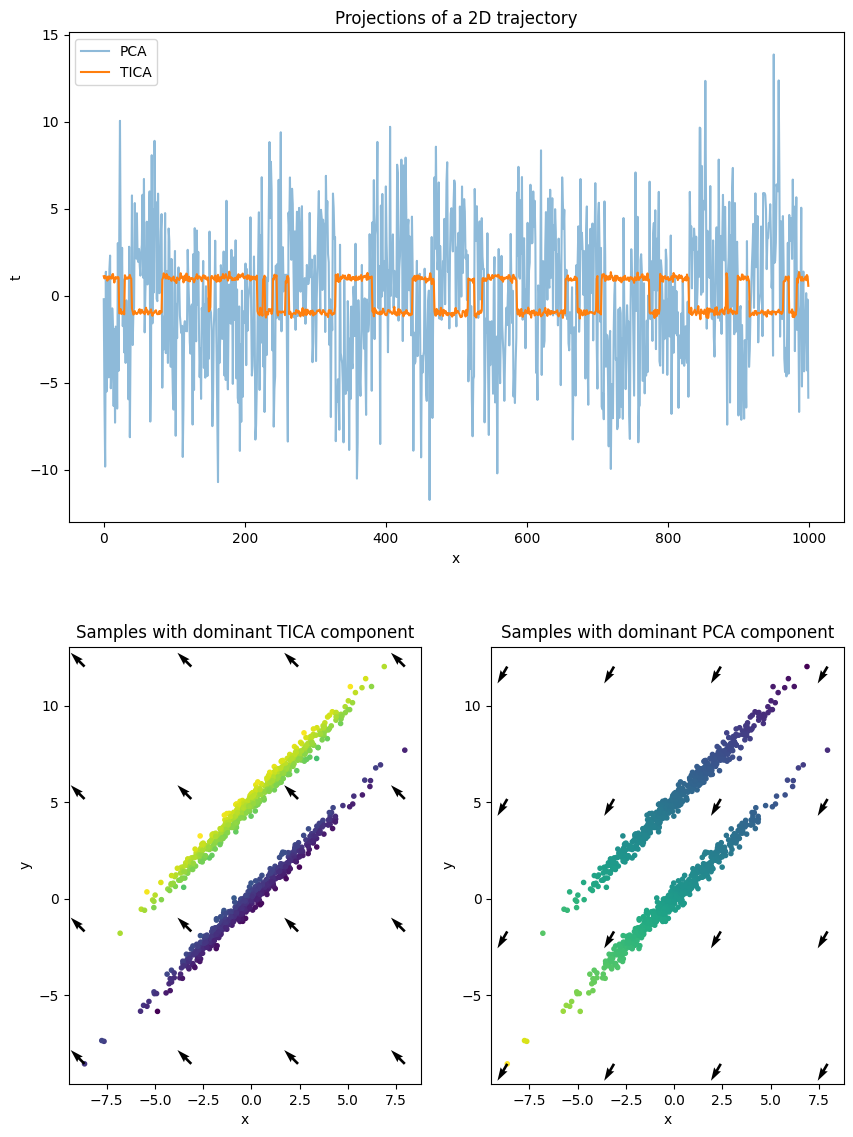

In [5]:
dxy_tica = tica.eigenvectors_[:, 0]

pca = PCA(n_components=2)
pca.fit(feature_trajectory)
pca_projection = pca.transform(feature_trajectory)
dxy_pca = pca.components_[0]  # dominant pca component

f = plt.figure(constrained_layout=False, figsize=(10, 14))
gs = f.add_gridspec(nrows=2, ncols=2)
ax_projections = f.add_subplot(gs[0, :])
ax_tica = f.add_subplot(gs[1, 0])
ax_pca = f.add_subplot(gs[1, 1])

ax_projections.set_title("Projections of a 2D trajectory")
ax_projections.set_xlabel('x')
ax_projections.set_ylabel('t')

ax_projections.plot(pca_projection[:,0], label='PCA', alpha=.5)
ax_projections.plot(np.array(tica_projection)[:,0], label='TICA')

ax_projections.legend()

plot_dominant_component(ax_pca, dxy_pca, pca_projection[:,0], 'Samples with dominant PCA component')
plot_dominant_component(ax_tica, dxy_tica, np.array(tica_projection)[:,0], 'Samples with dominant TICA component')

